# 1.0 IMPORTS

In [1]:
import numpy as np
from sklearn import datasets 
from sklearn import tree 
from sklearn import metrics
from sklearn import model_selection as ms
from matplotlib import pyplot as plt

# 2.0 Create Synthetic Data

In [2]:
n_samples = 20000
n_features = 2
n_informative = 2
n_redundant = 0
random_state = 0

# Create data
X, y = datasets.make_classification(n_samples=n_samples, n_features=n_features, n_informative=n_informative, 
                                    n_redundant=n_redundant, random_state=random_state)

# Split between project and production data
X, X_prod, y, y_prod = ms.train_test_split(X, y, test_size=0.2, random_state=random_state)

# 3.0 No Data Splitting

In [3]:
# Train with all available data
model = tree.DecisionTreeClassifier(max_depth=26)

model.fit(X, y)

yhat = model.predict(X)

acc = metrics.accuracy_score(y, yhat)

print(f'Performance over all data: {acc}')

Performance over all data: 0.996875


In [4]:
# Model in production
yhat_prod = model.predict(X_prod)

acc_prod = metrics.accuracy_score(y_prod, yhat_prod)

print(f'Performance over all data: {acc_prod}')

Performance over all data: 0.85225


# 4.0 TRAIN/VALIDATION/TEST STRATEGY

In [5]:
# Split data into train-test
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=random_state)

# Split data into train-validation
X_train, X_val, y_train, y_val = ms.train_test_split(X_train, y_train, test_size=0.2, random_state=random_state)

In [6]:
# Escolha de parâmetros para o algoritmo

values = [i for i in range(1, 50)]
train_scores, val_scores = list(), list()

for i in values:

    model = tree.DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)

    # Prediction over train
    yhat_train = model.predict(X_train)
    acc_train = metrics.accuracy_score(y_train, yhat_train)

    train_scores.append(acc_train)

    # Prediction over validation
    yhat_val = model.predict(X_val)
    acc_val = metrics.accuracy_score(y_val, yhat_val)

    val_scores.append(acc_val)

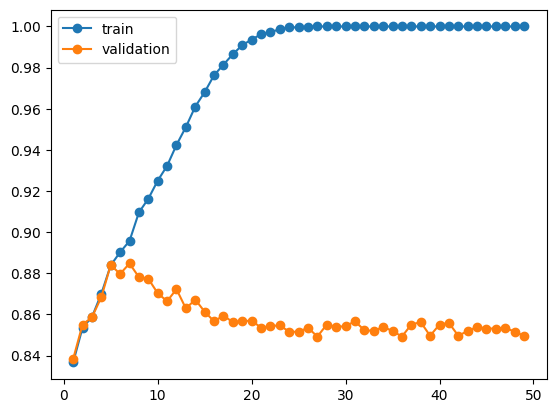

In [7]:
# Plot the results
plt.plot(values, train_scores, '-o', label='train' )
plt.plot(values, val_scores, '-o', label='validation' )
plt.legend()
plt.show()

In [8]:
# Model trained and validated with train dataset
model_train = tree.DecisionTreeClassifier(max_depth=5)
model_train.fit(X_train, y_train)

# Prediction over train
yhat_train = model_train.predict(X_train)
acc_train = metrics.accuracy_score(y_train, yhat_train)
print("Accuracy Over Training: {}".format(acc_train))

# Prediction over validation
yhat_val = model_train.predict(X_val)
acc_val = metrics.accuracy_score(y_val, yhat_val)
print("Accuracy Over Validacao: {}".format(acc_val))

# Prediction over test
yhat_test = model_train.predict(X_test)
acc_test = metrics.accuracy_score(y_test, yhat_test)
print("Accuracy Over Testing: {}".format(acc_test))

# Predction over production
yhat_prod = model_train.predict(X_prod)
acc_prod = metrics.accuracy_score(y_prod, yhat_prod)
print( "Accuracy Over production: {}".format( acc_prod ))

Accuracy Over Training: 0.88388671875
Accuracy Over Validacao: 0.883984375
Accuracy Over Testing: 0.880625
Accuracy Over production: 0.87275


The difference is not that big from train performance to validation and testing, but this difference should be greater. Although, it is normal that the validation performance is higher than test, and test performance is higher than production.

# 5.0 WHEN OVERFITTING HAPPENS

In [9]:
# Model trained and validated with train dataset
model_train = tree.DecisionTreeClassifier(max_depth=19)
model_train.fit(X_train, y_train)

# Prediction over train
yhat_train = model_train.predict(X_train)
acc_train = metrics.accuracy_score(y_train, yhat_train)
print("Accuracy Over Training: {}".format(acc_train))

# Prediction over validation
yhat_val = model_train.predict(X_val)
acc_val = metrics.accuracy_score(y_val, yhat_val)
print("Accuracy Over Validacao: {}".format(acc_val))

# Prediction over test
yhat_test = model_train.predict(X_test)
acc_test = metrics.accuracy_score(y_test, yhat_test)
print("Accuracy Over Testing: {}".format(acc_test))

# Predction over production
yhat_prod = model_train.predict(X_prod)
acc_prod = metrics.accuracy_score(y_prod, yhat_prod)
print( "Accuracy Over production: {}".format( acc_prod ))

Accuracy Over Training: 0.99140625
Accuracy Over Validacao: 0.8546875
Accuracy Over Testing: 0.8540625
Accuracy Over production: 0.8545
